In [1]:
dict(
    author="Rob Stenson",
    location="Monrovia, California",
    slug="truchet-experiments",
    title="Truchet Experiments",
    date="11/12/2022",
    description="Experimenting with programmatically generating and animating Truchet tiles"
)

{'author': 'Rob Stenson',
 'location': 'Monrovia, California',
 'slug': 'truchet-experiments',
 'title': 'Truchet Experiments',
 'date': '11/12/2022',
 'description': 'Experimenting with programmatically generating and animating Truchet tiles'}

In [ ]:
#hide-blog
%pip install -q "coldtype[notebook] @ git+https://github.com/goodhertz/coldtype"
from coldtype.notebook import *

### Prologue

I’ve had an odd amount of time lately, both in that it’s odd I have time, and that the time I had have has been odd. I haven't been working much, because I've been waiting for my daughter to be born, except now I've been waiting for almost two weeks, which makes every day odder: everyday I wake up and realize my daughter is still rolling around in her mother's womb. The due date has come and gone, though "due" is a nebulous concept. Turns out many doctors — like many engineers — love to speak confidently about things they only vaguely understand. (Update: she’s been born!)

Anyway, all that is to say, I don't know why I've started filling little voids in my day with [Truchet tile](https://en.wikipedia.org/wiki/Truchet_tiles) experiments.

After putting together a [long talk about 3D](https://youtu.be/gV2laWd727U), I started craving flatness again, and then I found myself on Maurice Meilleur’s website, looking at his incredible [Truchet tile motion experiments](https://mauricemeilleur.net/truchet_tiles), trying to figure out how to recreate them in Coldtype.

And then I started playing with those ideas, and then I started an interactive Google Colab notebook to show off some of the results, and then I rewrote the blog engine for this site to convert Google Colab notebooks into blog posts. So here we are. Odd time filled. Maybe these can fill an odd time in your life, too.

## Truchet Tiles

We begin with a square.


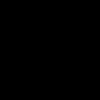

<®:P:RecordingPen(5mvs)>

In [ ]:
rect = Rect(100, 100)
P().rect(rect).f(0)

And a circle.


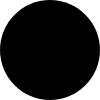

<®:P:RecordingPen(6mvs)>

In [ ]:
P().oval(rect).f(0)

Here they are as a single path, outlined:


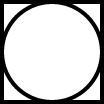

<®:P:RecordingPen(34mvs)>

In [ ]:
(P().rect(rect)
    .oval(rect)
    .outline(2)
    .f(0))

Here's the square with two of the circles, but here the circles have been offset by half the width and height of the square, in opposite directions.


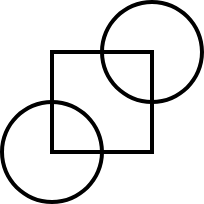

<®:P:/3...>

In [ ]:
(P().rect(rect)
    .ups()
    .append(P().oval(rect).t(rect.w/2))
    .append(P().oval(rect).t(-rect.w/2))
    .outline(2)
    .f(0))

And here’re those three shapes again, except this time the circles have been cut away from the square, rather than added to it (the `append` has become a `difference`).


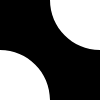


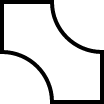

<®:P:RecordingPen(29mvs) {frame=Rect(0.00,0.00,100.00,100.00)}>

In [ ]:
tile = (P().rect(rect)
    .difference(P().oval(rect).t(rect.w/2))
    .difference(P().oval(rect).t(-rect.w/2))
    .f(0)
    .data(frame=rect)
    .nshow())

# Maybe clearer what the shape is if it's outlined

tile.copy().outline(2)

If you repeat that tile in the x and y dimensions, you start to see the appeal of the tiles when patterned.


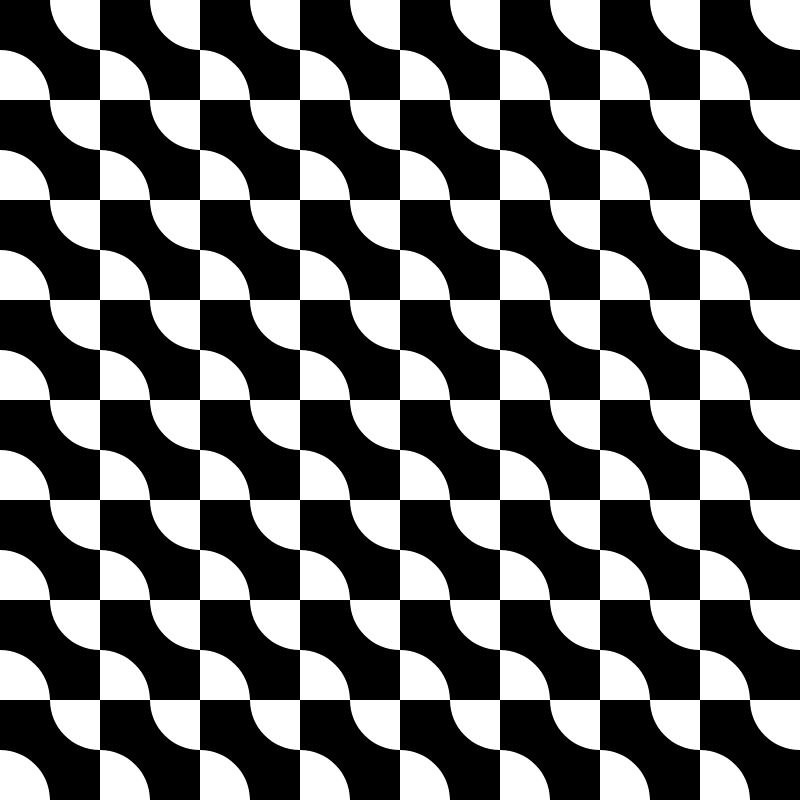

In [ ]:
n = 8

truchet0 = (tile.copy()
    .layer(n)
    .spread()
    .layer(n)
    .stack()
    .nshow())

That can be shorter though.

`.layer(n)​.spread()​.layer(n)​.stack()` means copy the original path `n` times (via `layer`) and then `spread` them out horizontally. And then copy that one spread-out row `n` more times (again with `layer`), and then `stack` those new copies vertically. (Stack is the vertical version of spread).

I started doing this pattern a lot, so I added a function that encapsulates that idiom: `.gridlayer` — a method that does those four operations as a single operation, like this:


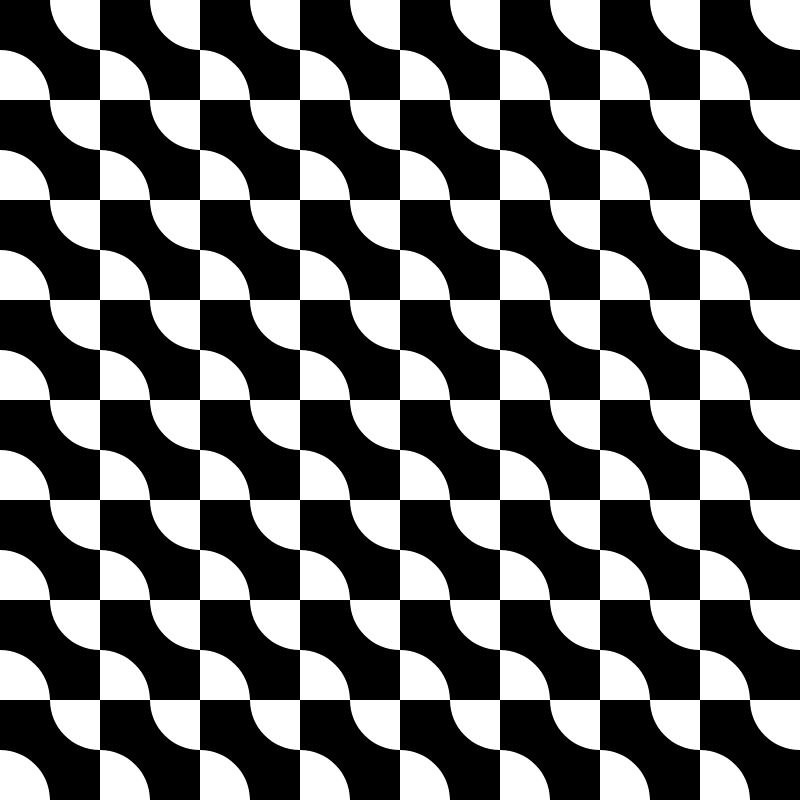

In [ ]:
truchet1 = (tile.copy()
    .gridlayer(n)
    .nshow())

Because these are Truchet tiles, we can rotate them to create interesting patterns. In this first rotation, we'll rotate every other one (i.e. rotate "by column") to get a kind of sine wave look.

This is where the `.mapvrc` function becomes very useful: we can **map** by **r**ow and **c**olumn. Which is why the `lambda` here gets three arguments: r, c, p — row, column, path.


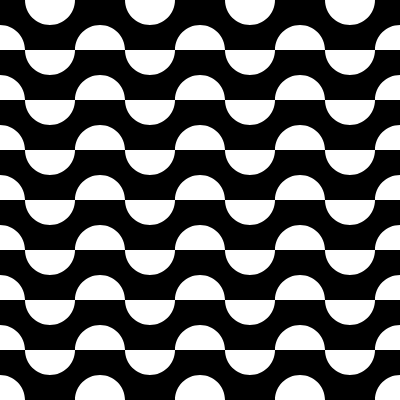

<®:P:/8...>

In [ ]:
(truchet1
    .copy()
    .scale(0.5)
    .mapvrc(lambda r, c, p: p.rotate(90 if c%2 else 0)))

A special case of mapping by row & column is `mapvch` — shorthand for **m**ap-**ch**ecker. You get two args here in your callback: the first is a boolean that indicates whether or not you’re in a "black" square on a checkerboard.

Here we rotate 90° if `b` is `True`, which gets us this nice offset circles pattern.


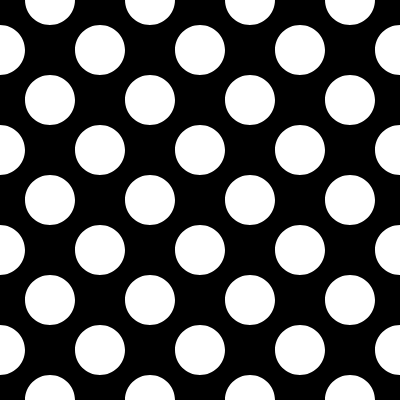

<®:P:/8...>

In [ ]:
(truchet1
    .copy()
    .scale(0.5)
    .mapvch(lambda b, p: p.rotate(90 if b else 0)))

Maybe a little easier to understand if we add a little color. Here the green tiles have been rotated 90 degrees; the blue tiles have not been rotated at all.


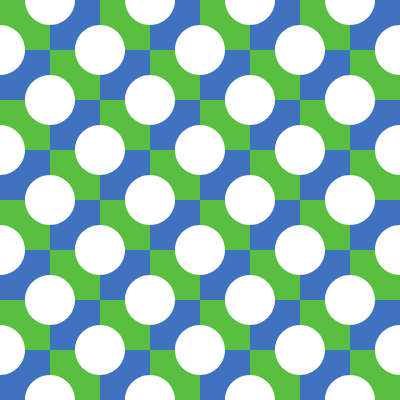

<®:P:/8...>

In [ ]:
(truchet1
    .copy()
    .scale(0.5)
    .mapvch(lambda b, p: p
        .rotate(90 if b else 0)
        .f(hsl(0.6) if b else hsl(0.3))))

Of course, it’s just as much fun to rotate things randomly. Here we accomplish that with a `random_series` (which lets us get repeatable randomization), and the ever-useful `mapv` function, which optionally gives us two args in our lambda. (If we ask for two args, the first is an index, the second is the path.)


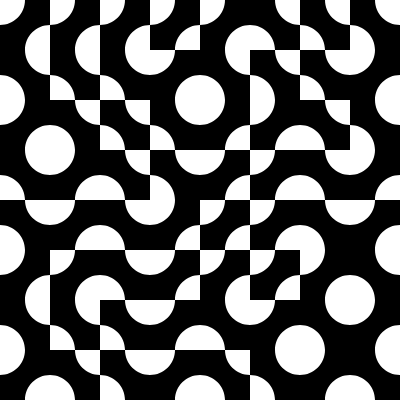

<®:P:/8...>

In [ ]:
rs = random_series(-2, 2, seed=2)

(truchet1
    .copy()
    .scale(0.5)
    .mapv(lambda i, p: p.rotate(90*int(rs[i]))))

# Variations

And now I'd like to freestyle some patterns based on the above.

One key difference from the above: in these patterns, we’re creating the "tile" on the fly and layering it into a pattern — all in a single expression.

(The `nshow` call lets us view an _intermediate_ result, which means we can see how the tile looks before the rest of the patterning code.)


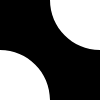


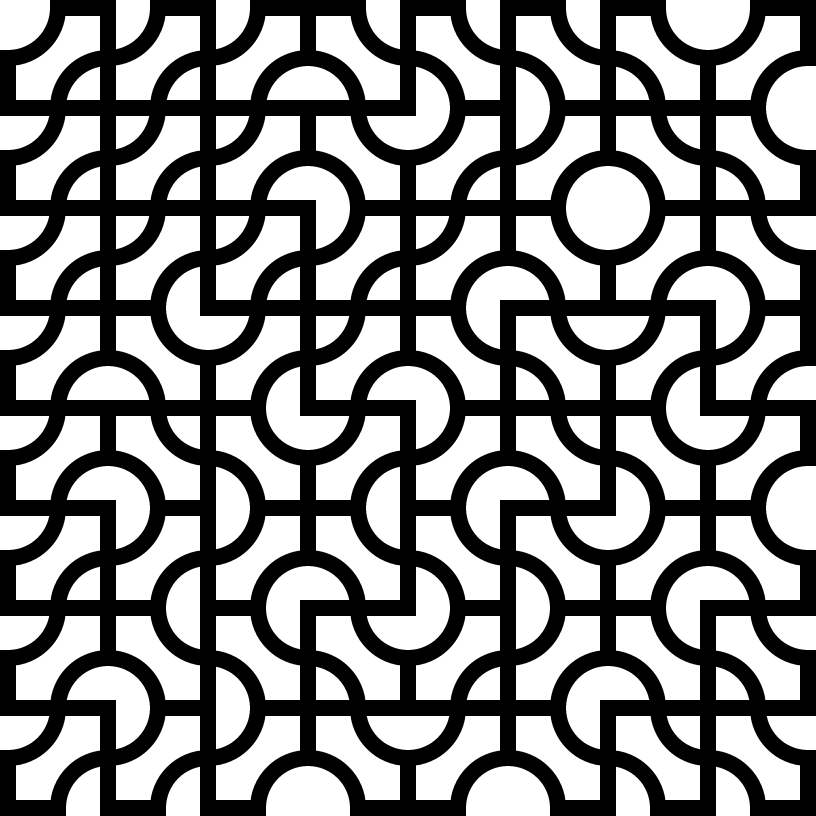

<®:P:/64...>

In [ ]:
# Outlining the tiles

rs2 = random_series(-2, 2, seed=1)

(P().rect(rect)
    .difference(P().oval(rect).t(rect.w/2))
    .difference(P().oval(rect).t(-rect.w/2))
    .f(0)
    .data(frame=rect)
    .nshow()
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i])))
    .collapse()
    .mapv(lambda p: p.outline(8)))

(If you were to uncomment the xor in this one, you'd get an inverse pattern.)


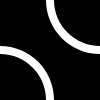


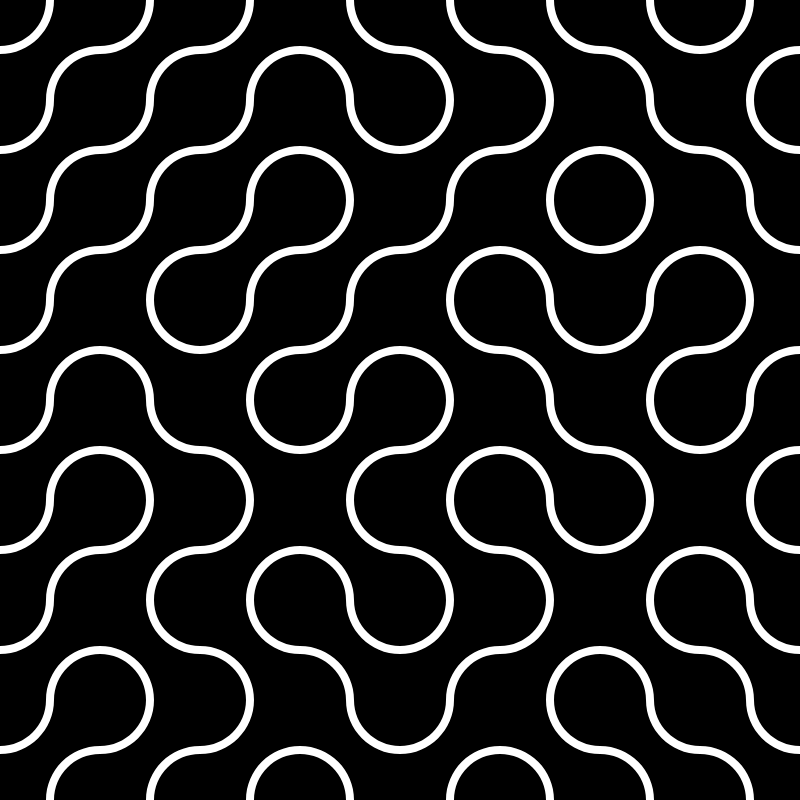

<®:P:/8...>

In [ ]:
(P().rect(rect)
    .difference(P().oval(rect).t(rect.w/2).outline(4))
    .difference(P().oval(rect).t(-rect.w/2).outline(4))
    #.xor(P(rect))
    .f(0)
    .nshow()
    .data(frame=rect)
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i]))))

This one kind of looks like tennis balls?


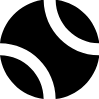


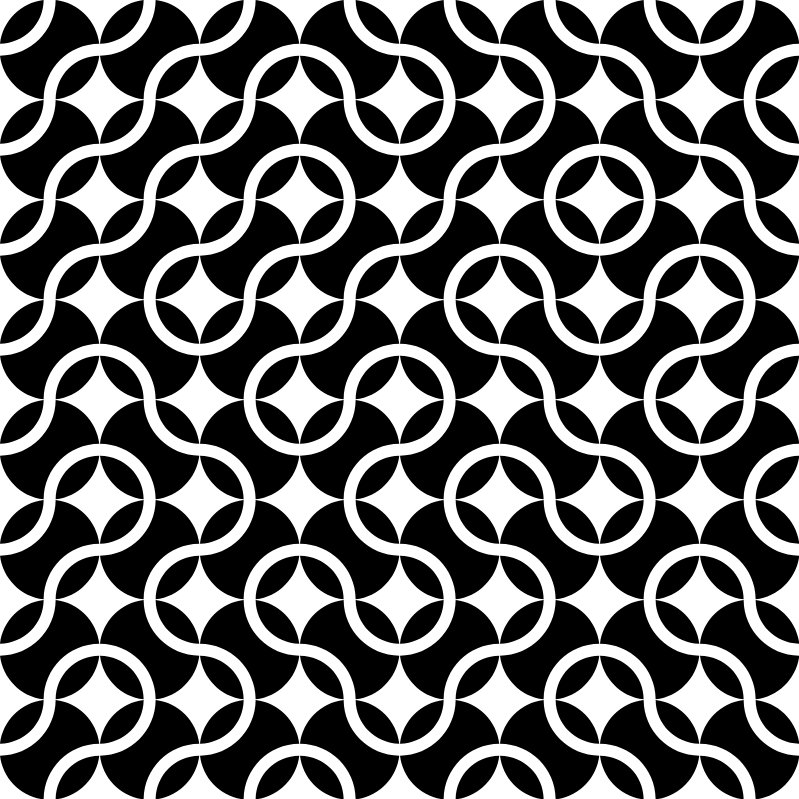

<®:P:/8...>

In [ ]:
(P().oval(rect)
    .difference(P().oval(rect).t(rect.w/2).outline(6))
    .difference(P().oval(rect).t(-rect.w/2).outline(6))
    .f(0)
    .nshow()
    .data(frame=rect)
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i]))))

I'd love to see a wall that looked this:


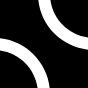


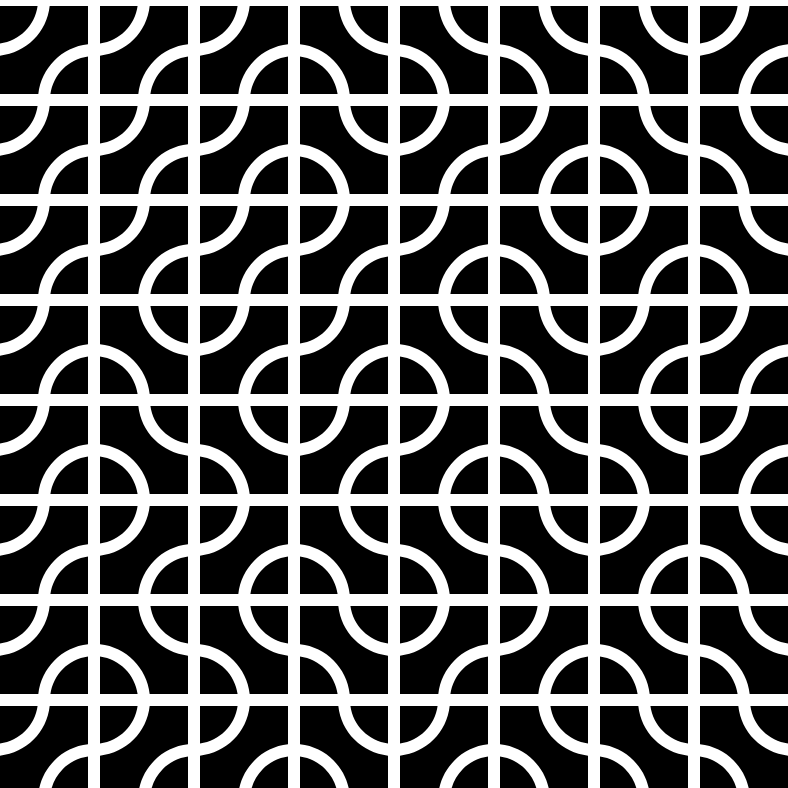

<®:P:/8...>

In [ ]:
(P().rect(rect)
    .difference(P().oval(rect).t(rect.w/2).outline(6))
    .difference(P().oval(rect).t(-rect.w/2).outline(6))
    .intersection(P(rect.inset(6)))
    .f(0)
    .nshow()
    .data(frame=rect)
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i]))))

Here the initial pattern changes — cutting circles out of a circle, rather than circles from a square.


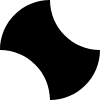


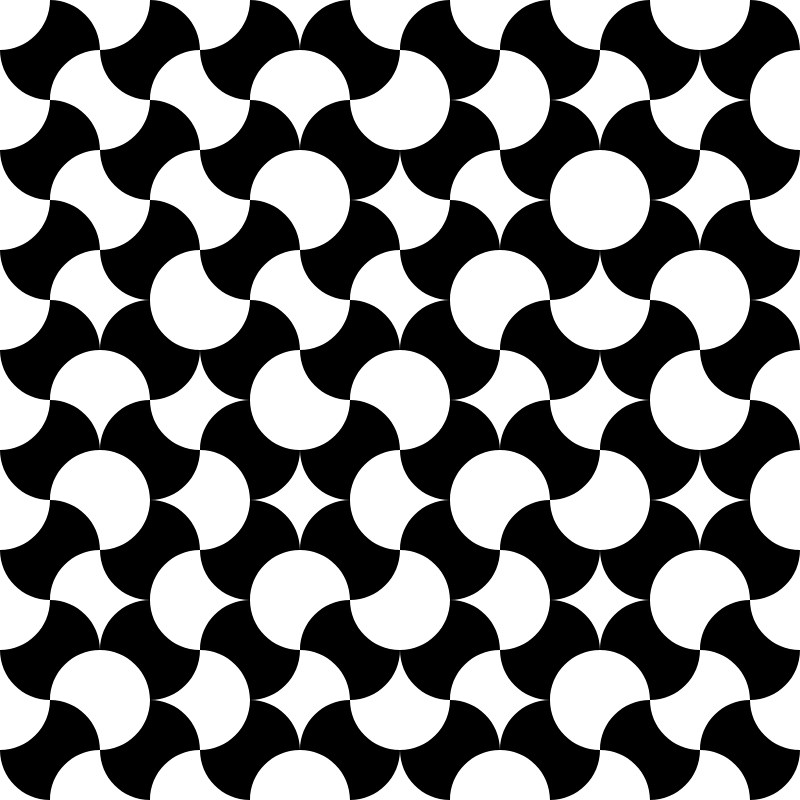

<®:P:/8...>

In [ ]:
(P().oval(rect)
    .difference(P().oval(rect).t(rect.w/2))
    .difference(P().oval(rect).t(-rect.w/2))
    .f(0)
    .nshow()
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i]))))


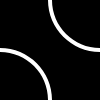


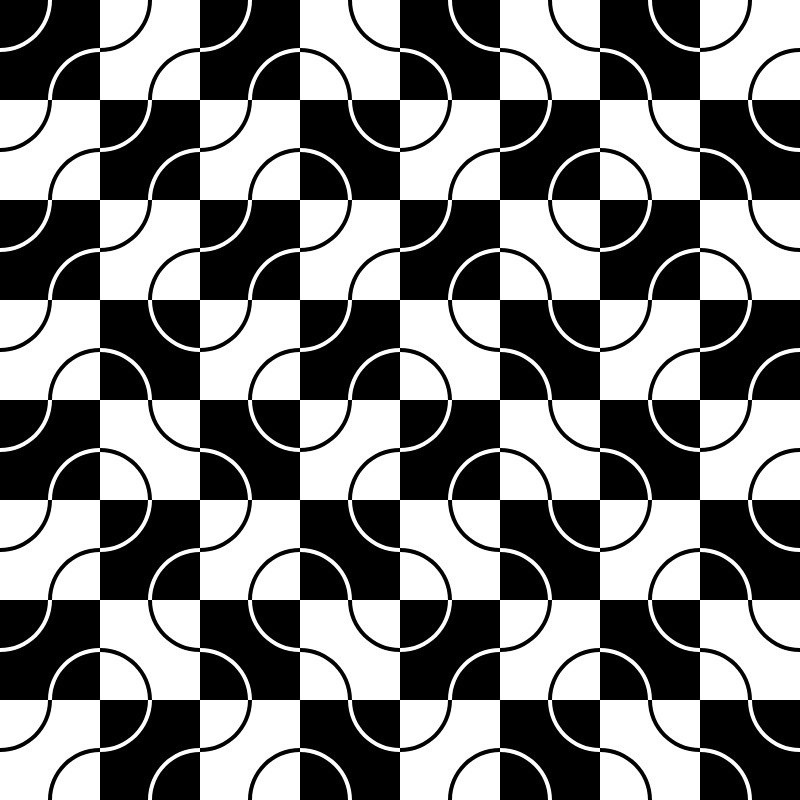

<®:P:/8...>

In [ ]:
(P().rect(rect)
    .difference(P().oval(rect).t(rect.w/2).outline(2))
    .difference(P().oval(rect).t(-rect.w/2).outline(2))
    .f(0)
    .nshow()
    .data(frame=rect)
    .gridlayer(n)
    .mapv(lambda i, p: p.rotate(90*int(rs2[i])))
    .mapvch(lambda b, p: p.xor(P().rect(p.ambit(th=1, tv=1).inset(0))) if b else p)
    #.f(hsl(0.9, 0.8, 0.6))
    )

# Hexagons

Here’s a variation on the square tiles above, this time using a hexagon tile with a pattern I (once again) cribbed [from Maurice Meilleur](https://mauricemeilleur.net/truchet_tiles).

An open question: does this pattern have something to do with Aphex Twin?

(I’ll admit: because I'm very bad at math, this one took me a very long time to figure out, and also the code is much less flowing.)


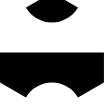


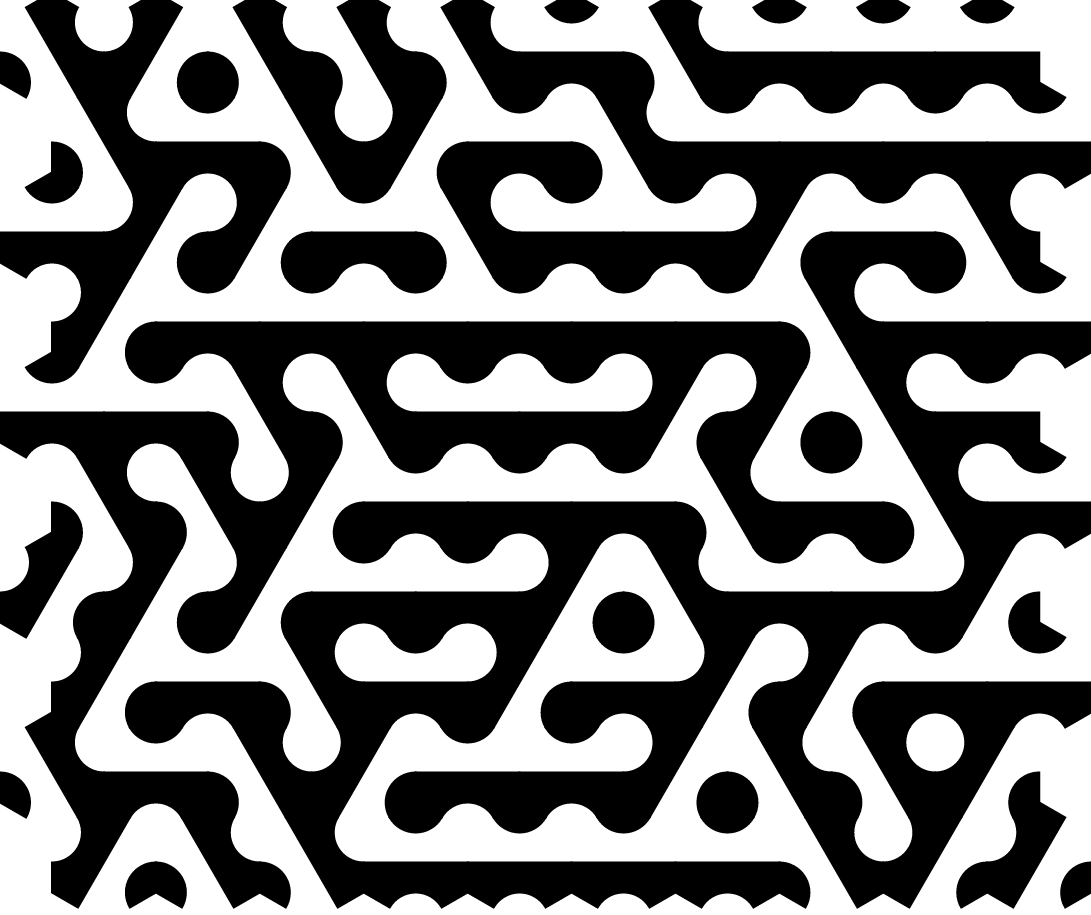

In [ ]:
from coldtype.fx.shapes import polygon

r = Rect(120, 120)

hex = P().ch(polygon(6, r))
hexr = hex.ambit(th=1, tv=1)
p1y = hex._val.value[0][-1][-1][-1]

rr = r.w/4

hex_pattern = (hex.copy()
    .intersection(P()
        .append(P().oval(r.inset(rr)).t(0, rr*2))
        .append(P().rect(hexr.take(rr*2, "S"))
            .difference(P().oval(r.inset(rr)).t(0, -rr*2))))
    .f(0)
    .data(frame=hexr)
    .nshow()
    .gridlayer(10, lead=-hexr.h-p1y)
    .mapvrc(lambda r, c, p: p.t(hexr.w/2 if not r%2 else 0, 0))
    .mapv(lambda i, p: p.rotate(120*int(rs2[i]), th=0, tv=0))
    .fssw(0, 0, 2)
    .nshow())


Here’s that same pattern altered slightly and sent through a rasterization pass with `phototype`, which we’re using here to soften the edges of all the boolean path operations.


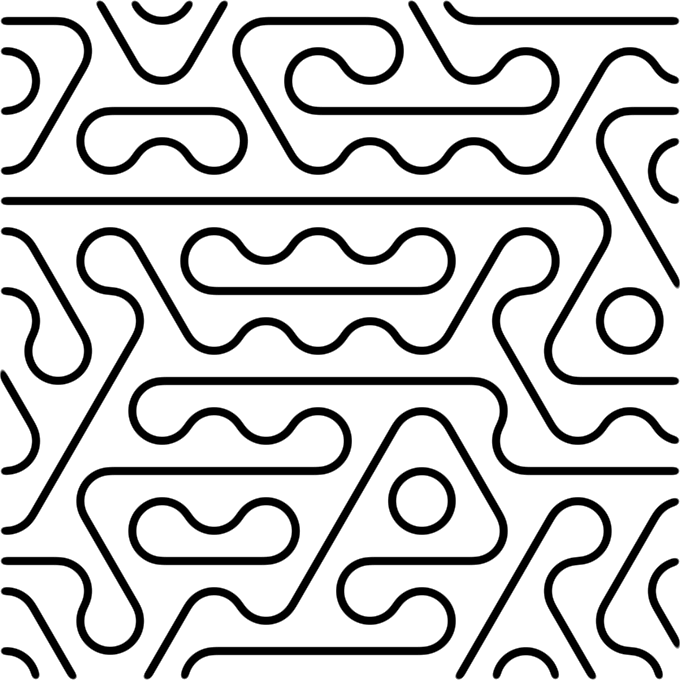

<®:P:RecordingPen(5mvs)>

In [ ]:
from coldtype.fx.skia import phototype

(hex_pattern
    .copy()
    .pen()
    .align(Rect(1000, 1000))
    .unframe()
    .intersection(P(Rect(1000, 1000).take(800, "CX").square()))
    .outline(4)
    .fssw(1, 0, 0)
    .zero()
    .ch(phototype(Rect(800, 800).inset(60), blur=3, cutw=20, fill=0)))

# Animation

In [ ]:
@animation((600, 600), bg=1, tl=30, render_show=True)
def tennis_balls(f):
    tb = f.a.r.take(100, "SW")
    return (P().oval(tb)
        .difference(P().oval(tb).t(tb.w/2).outline(6))
        .difference(P().oval(tb).t(-tb.w/2).outline(6))
        .f(0)
        .data(frame=tb)
        .gridlayer(6)
        .mapv(lambda i, p: p.rotate(90*int(rs2[i])))
        .mapv(lambda i, p: p.rotate(f.e("eeio", 0, r=(0, 180)))))

In [ ]:
tr = Rect(100)
tn = 5

at = AsciiTimeline(7, 30, """
<
[0 ]                           [1 ]
  [1    ]           [0  ]
             [2  ]             [2  ]
                     [3 ]        [3  ]
                      [4 ]    [4 ]
            [5         ]           [5  ]   <
             [6  ]               [6  ]
""")

@animation((500, 500), tl=at, bg=1, render_show=True)
def offset_turns(f):
    return (P(tr)
        .difference(P()
            .append(P().oval(tr).t(tr.w/2))
            .append(P().oval(tr).t(-tr.w/2)))
        .f(0)
        .data(frame=tr)
        .gridlayer(tn)
        .mapv(lambda i, p: p.rotate(at.ki(f"{i%6}").ec("eeio", (0, 90)))))

In [ ]:
@animation((500, 500), tl=at, bg=1, render_show=True)
def offset_turns_colorful(f):
    return (P(tr)
        .difference(P()
            .append(P().oval(tr).t(tr.w/2))
            .append(P().oval(tr).t(-tr.w/2)))
        .f(0)
        .data(frame=tr)
        .gridlayer(tn)
        .mapv(lambda i, p: p
            .rotate(at.ki(f"{i%6}").ec("eeio", (0, 90)))
            .f(hsl(i%6/6))))